In [28]:
import urllib.request
import zipfile
import tensorflow as tf
import os
from keras_preprocessing.image import ImageDataGenerator
#from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy, CategoricalCrossentropy
import cv2
from tensorflow.keras.preprocessing import image as keras_image
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from keras.models import Model


# Load Data

In [29]:
TRAINING_DIR = "dataset-4/train"
TEST_DIR = "dataset-4/val"

In [30]:
training_datagen = ImageDataGenerator(rescale=1./255)
train_generator= training_datagen.flow_from_directory(
                    TRAINING_DIR,
                    target_size=(224, 224),
                    batch_size=64,
                    class_mode='categorical')

Found 6750 images belonging to 15 classes.


In [31]:
class_names = list(train_generator.class_indices.keys())
print("Class names:", class_names)

Class names: ['bok choy', 'brokoli', 'cabai', 'jagung', 'jamur', 'kentang', 'kol', 'paprika', 'sawi', 'selada', 'tauge', 'terong', 'timun', 'tomat', 'wortel']


In [32]:
class_counts = {class_name: 0 for class_name in class_names}

# Iterate through the directory and count the images in each class
for class_name in class_names:
    class_path = os.path.join(TRAINING_DIR, class_name)
    class_count = len(os.listdir(class_path))
    class_counts[class_name] = class_count

# Display the number of images in each class
for class_name, count in class_counts.items():
    print(f"Class '{class_name}' has {count} images.")

Class 'bok choy' has 450 images.
Class 'brokoli' has 450 images.
Class 'cabai' has 450 images.
Class 'jagung' has 450 images.
Class 'jamur' has 450 images.
Class 'kentang' has 450 images.
Class 'kol' has 450 images.
Class 'paprika' has 450 images.
Class 'sawi' has 450 images.
Class 'selada' has 450 images.
Class 'tauge' has 450 images.
Class 'terong' has 450 images.
Class 'timun' has 450 images.
Class 'tomat' has 450 images.
Class 'wortel' has 450 images.


In [33]:
val_datagen = ImageDataGenerator(rescale=1. / 255)

val_generator = val_datagen.flow_from_directory(
                    TEST_DIR,
                    target_size=(224, 224),
                    batch_size=32,
                    class_mode='categorical')

Found 375 images belonging to 15 classes.


In [34]:
class_names = list(val_generator.class_indices.keys())
print("Class names:", class_names)

Class names: ['bok choy', 'brokoli', 'cabai', 'jagung', 'jamur', 'kentang', 'kol', 'paprika', 'sawi', 'selada', 'tauge', 'terong', 'timun', 'tomat', 'wortel']


In [35]:
class_counts = {class_name: 0 for class_name in class_names}

# Iterate through the directory and count the images in each class
for class_name in class_names:
    class_path = os.path.join(TEST_DIR, class_name)
    class_count = len(os.listdir(class_path))
    class_counts[class_name] = class_count

# Display the number of images in each class
for class_name, count in class_counts.items():
    print(f"Class '{class_name}' has {count} images.")

Class 'bok choy' has 25 images.
Class 'brokoli' has 25 images.
Class 'cabai' has 25 images.
Class 'jagung' has 25 images.
Class 'jamur' has 25 images.
Class 'kentang' has 25 images.
Class 'kol' has 25 images.
Class 'paprika' has 25 images.
Class 'sawi' has 25 images.
Class 'selada' has 25 images.
Class 'tauge' has 25 images.
Class 'terong' has 25 images.
Class 'timun' has 25 images.
Class 'tomat' has 25 images.
Class 'wortel' has 25 images.


# try pre-trained model

In [36]:
from keras.applications import MobileNetV2

from keras.applications import MobileNet
from keras.applications.mobilenet import preprocess_input

img_rows, img_cols = 224, 224


# Load MobileNetV2 without the top classification layers
mobilenet_v2 = MobileNetV2(weights='imagenet',
                           include_top=False,
                           input_shape=(img_rows, img_cols, 3))


for layer in mobilenet_v2.layers:
    layer.trainable = False

# Define your custom top layers for classification
def add_top_layers(bottom_model, num_classes):
    top_model = bottom_model.output
    top_model = GlobalAveragePooling2D()(top_model)
    top_model = Dense(1024, activation='relu')(top_model)
    top_model = Dense(1024, activation='relu')(top_model)
    top_model = Dense(512, activation='relu')(top_model)
    top_model = Dense(num_classes, activation='softmax')(top_model)
    return top_model

num_classes = 15

# Create the top layers
top_layers = add_top_layers(mobilenet_v2, num_classes)

# Combine MobileNet base and custom top layers
model = Model(inputs=mobilenet_v2.input, outputs=top_layers)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='loss', min_delta=0, patience=0, verbose=1, mode='min', restore_best_weights=True)

# Train your model (assuming train_generator and val_generator are defined)
history = model.fit(train_generator,
                    epochs=10,
                    validation_data=val_generator,
                    verbose=1,
                    initial_epoch=0)
                    #callbacks=[early_stopping])


Epoch 1/10
106/106 [==============================] - 132s 1s/step - loss: 0.2541 - accuracy: 0.9230 - val_loss: 0.1032 - val_accuracy: 0.9653
Epoch 2/10
106/106 [==============================] - 127s 1s/step - loss: 0.0461 - accuracy: 0.9856 - val_loss: 0.0529 - val_accuracy: 0.9840
Epoch 3/10
106/106 [==============================] - 134s 1s/step - loss: 0.0289 - accuracy: 0.9911 - val_loss: 0.0647 - val_accuracy: 0.9760
Epoch 4/10
106/106 [==============================] - 133s 1s/step - loss: 0.0342 - accuracy: 0.9916 - val_loss: 0.0369 - val_accuracy: 0.9840
Epoch 5/10
106/106 [==============================] - 129s 1s/step - loss: 0.0095 - accuracy: 0.9973 - val_loss: 0.0397 - val_accuracy: 0.9867
Epoch 6/10
106/106 [==============================] - 128s 1s/step - loss: 0.0162 - accuracy: 0.9963 - val_loss: 0.0445 - val_accuracy: 0.9867
Epoch 7/10
106/106 [==============================] - 127s 1s/step - loss: 0.0142 - accuracy: 0.9948 - val_loss: 0.0564 - val_accuracy: 0.9813

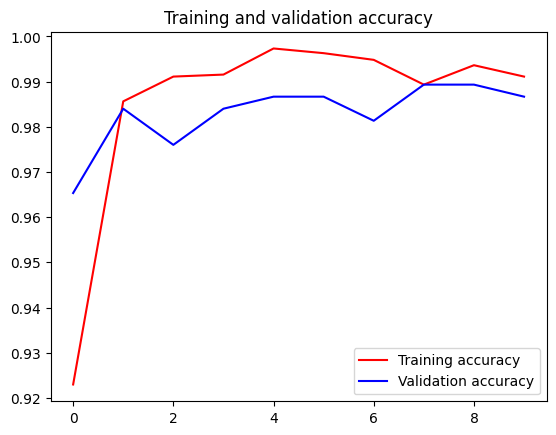

<Figure size 640x480 with 0 Axes>

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

# Convert Model to h5 and tflite

In [38]:
model.save("mobilev2_data4_98_2.h5")

C:\Users\CLisanthoni\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 1s 1s/step


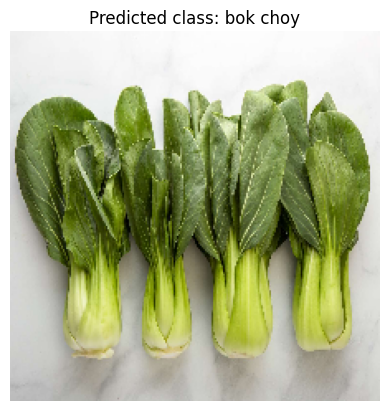

In [46]:

model = tf.keras.models.load_model('mobilev2_data4_98_2.h5')

img_path = 'bokchoy.jpg'
img = keras_image.load_img(img_path, target_size=(224, 224))  # Load the image using Keras preprocessing

# Rescale and convert to an array
x = keras_image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = x / 255.0  # Rescale pixel values to [0, 1] range
x = np.clip(x, 0, 1)  # Clip to ensure the values stay within the valid range

# Make prediction
predictions = model.predict(x)
predicted_class_index = np.argmax(predictions)
predicted_class_name = class_names[predicted_class_index]

# Display the image with the predicted class
plt.imshow(img)  # Display the loaded image
plt.axis('off')
plt.title(f"Predicted class: {predicted_class_name}")
plt.show()


In [45]:
model = tf.keras.models.load_model('mobilev2_data4_98_2.h5')

# Assuming 'model' and 'class_names' are defined as in your previous code
nama_kelas = ["bok choy", "brokoli", "cabai", "jagung", "jamur", "kentang", "kol", "paprika", "sawi", "selada", "tauge", "terong", "timun", "tomat", "wortel"]
total_hasil_benar = 0

for kelas in nama_kelas:
    folder_path = 'dataset-4/test/{}/'.format(kelas)  # Path to the folder containing images

    hasil_benar=0
    for filename in os.listdir(folder_path):
        if filename.endswith(('.jpg', '.jpeg', '.png')):  # Consider only image files
            img_path = os.path.join(folder_path, filename)
            img = keras_image.load_img(img_path, target_size=(224, 224))  # Load the image using Keras preprocessing
            x = keras_image.img_to_array(img)
            x = np.expand_dims(x, axis=0)
            x = x / 255.0  # Rescale pixel values to [0, 1] range
            x = np.clip(x, 0, 1)  # Clip to ensure the values stay within the valid range
            
            # Make prediction
            predictions = model.predict(x)
            predicted_class_index = np.argmax(predictions)
            predicted_class_name = class_names[predicted_class_index]
            if predicted_class_name == kelas:
                hasil_benar+=1

    print(kelas)
    print("banyak hasil benar:", hasil_benar)
    print("presentase benar: ", hasil_benar/25)

    total_hasil_benar += hasil_benar

# Menghitung keseluruhan presentase kebenaran dari semua kelas
total_data = len(nama_kelas) * 25  # Total data uji untuk semua kelas
presentase_keseluruhan = (total_hasil_benar / total_data) * 100
print("Keseluruhan presentase kebenaran: ", presentase_keseluruhan)


1/1 [==============================] - 0s 45ms/step
bok choy
banyak hasil benar: 21
presentase benar:  0.84
1/1 [==============================] - 0s 41ms/step
brokoli
banyak hasil benar: 25
presentase benar:  1.0
1/1 [==============================] - 0s 44ms/step
cabai
banyak hasil benar: 25
presentase benar:  1.0
1/1 [==============================] - 0s 42ms/step
jagung
banyak hasil benar: 25
presentase benar:  1.0
1/1 [==============================] - 0s 40ms/step
jamur
banyak hasil benar: 25
presentase benar:  1.0
1/1 [==============================] - 0s 41ms/step
kentang
banyak hasil benar: 25
presentase benar:  1.0
1/1 [==============================] - 0s 42ms/step
kol
banyak hasil benar: 24
presentase benar:  0.96
1/1 [==============================] - 0s 46ms/step
paprika
banyak hasil benar: 21
presentase benar:  0.84
1/1 [==============================] - 0s 39ms/step
sawi
banyak hasil benar: 25
presentase benar:  1.0
1/1 [==============================] - 0s 42ms/step
se

In [47]:

# Load the Keras model
model = tf.keras.models.load_model('mobilev2_data4_98_2.h5')

# Convert the model to TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TensorFlow Lite model to a file
with open('mobilev2_data4_98_2.tflite', 'wb') as f:
    f.write(tflite_model)


INFO:tensorflow:Assets written to: C:\Users\CLISAN~1\AppData\Local\Temp\tmphvf_r03c\assets


INFO:tensorflow:Assets written to: C:\Users\CLISAN~1\AppData\Local\Temp\tmphvf_r03c\assets


# Coba panggil TFLite

In [48]:
model_path = 'mobilev2_data4_98_2.tflite'
interpreter = tf.lite.Interpreter(model_path=model_path)
interpreter.allocate_tensors()
output_details = interpreter.get_output_details()
input_details = interpreter.get_input_details()


In [49]:
input_details

[{'name': 'serving_default_input_2:0',
  'index': 0,
  'shape': array([  1, 224, 224,   3]),
  'shape_signature': array([ -1, 224, 224,   3]),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

In [50]:
output_details

[{'name': 'StatefulPartitionedCall:0',
  'index': 186,
  'shape': array([ 1, 15]),
  'shape_signature': array([-1, 15]),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

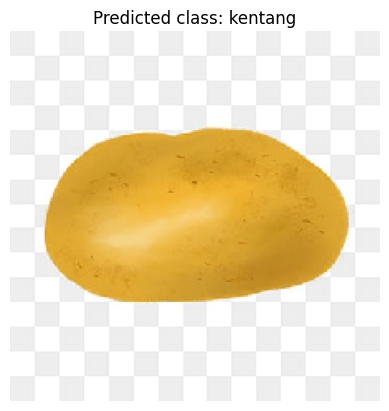

In [54]:
img_path = 'kentang.jpg'
img = keras_image.load_img(img_path, target_size=(224, 224))  # Load the image using Keras preprocessing

# Rescale and convert to an array
x = keras_image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = x / 255.0  # Rescale pixel values to [0, 1] range
x = np.clip(x, 0, 1)  # Clip to ensure the values stay within the valid range

interpreter.set_tensor(input_details[0]['index'], x)
interpreter.invoke()

output_data = []
for output_detail in output_details:
    output_data.append(interpreter.get_tensor(output_detail['index']))

predicted_class_index = np.argmax(output_data)
predicted_class_name = class_names[predicted_class_index]

# Display the image with the predicted class
plt.imshow(img)  # Display the loaded image
plt.axis('off')
plt.title(f"Predicted class: {predicted_class_name}")
plt.show()


In [24]:
predicted_class_index = np.argmax(output_data)
predicted_class_name = class_names[predicted_class_index]
predicted_class_name 


'jagung'

In [25]:
output_data

[array([[1.3437052e-12, 2.0193986e-13, 1.0119339e-12, 1.0000000e+00,
         7.8272865e-14, 4.8676167e-13, 2.3182803e-12, 8.3643947e-10,
         1.9364390e-11, 1.5844503e-11, 1.6116238e-10, 1.1202433e-12,
         2.2652470e-12, 3.6736187e-09, 1.3417848e-11]], dtype=float32)]